# AADB Data Access Workflow - Comprehensive Analysis

## Project Overview
This notebook provides a complete analysis of the AIM-AHEAD Data Bridge (AADB) data access workflow, addressing three key objectives:

1. **Process Analysis**: Historical data analysis with bottleneck identification
2. **Predictive Modeling**: Risk assessment for at-risk awardees  
3. **Operational Optimization**: Data-driven recommendations for process improvement

### Performance Targets
- **Overall Target**: 100 days from NOA to data access
- **Critical Path**: 78 days (optimal scenario)
- **NIH IRB Target**: ≤60 days
- **NIH DUA Target**: ≤90 days

---


## Setup and Imports


In [1]:
# Import required modules
import sys
import warnings
from pathlib import Path

# Add src folder to path for imports
src_path = Path(__file__).parent / 'src' if '__file__' in globals() else Path.cwd() / 'src'
sys.path.insert(0, str(src_path))

warnings.filterwarnings('ignore')

# Import AADB analysis modules
from data_loader import AADBDataLoader
from process_analyzer import AADBProcessAnalyzer
from risk_predictor import AADBRiskPredictor
from visualizations import AADBVisualizer
from report_generator import AADBReportGenerator
from config import *

print("✓ All modules imported successfully")
print(f"\nConfiguration:")
print(f"  Critical Path: {CRITICAL_PATH_DAYS} days")
print(f"  NIH IRB Target: {NIH_TARGETS['IRB_DAYS']} days")
print(f"  NIH DUA Target: {NIH_TARGETS['DUA_DAYS']} days")


✓ All modules imported successfully

Configuration:
  Critical Path: 78 days
  NIH IRB Target: 60 days
  NIH DUA Target: 90 days


---
## Part 1: Data Loading and Preprocessing


In [2]:
# Load all AADB tracker data (auto-detects data directory)
loader = AADBDataLoader()
loader.load_all_data()
loader.preprocess_all()
loader.get_summary_statistics()


Loading AADB Tracker Data...
✓ Master Tracker loaded: 17 records
✓ DUA Tracker loaded: 54 records
✓ IRB Tracker loaded: 57 records
✓ Master tracker preprocessed: 17 records
✓ DUA tracker preprocessed: 54 records
✓ IRB tracker preprocessed: 57 records

AADB DATA SUMMARY STATISTICS

MASTER TRACKER:
  Total Projects: 17
  Completed Projects: 14
  Average Total Process Time: 165.0 days
  Projects Meeting All Targets: 0

DUA TRACKER:
  Total Records: 54
  Average DUA Time: 98.1 days
  Records with Delays: 37

IRB TRACKER:
  Total Records: 57
  Letters Received: 52
  Exempt Determinations: 15


---
## Run Complete Analysis

Execute the main analysis script to perform all steps automatically:


---
## Part 2: Process Flow Analysis


In [3]:
# Initialize analyzer
analyzer = AADBProcessAnalyzer(loader)

# Run comprehensive process analysis
print("Analyzing process stages...")
stage_stats = analyzer.analyze_process_stages()

print("\n" + "="*70)
print("Analysis complete! Check the output above for detailed findings.")


Analyzing process stages...

PROCESS STAGE ANALYSIS

STAGE-BY-STAGE PERFORMANCE:
----------------------------------------------------------------------

✗ NOA to Initial Consult
   Benchmark: 30 days
   Average: 74.0 days (Median: 34.0)
   Range: 14 - 353 days
   Exceeding Benchmark: 9/17 (52.9%)
   ⚠ CRITICAL: 2.5x benchmark performance

⚠ Intake to Request Submission
   Benchmark: 14 days
   Average: 21.7 days (Median: 10.0)
   Range: 0 - 92 days
   Exceeding Benchmark: 5/17 (29.4%)
   ⚠ CRITICAL: 1.6x benchmark performance

✗ Submission to Finalization
   Benchmark: 30 days
   Average: 60.5 days (Median: 52.0)
   Range: 19 - 183 days
   Exceeding Benchmark: 9/15 (60.0%)
   ⚠ CRITICAL: 2.0x benchmark performance

✗ IRB Process
   Benchmark: 60 days
   Average: 120.0 days (Median: 136.5)
   Range: 20 - 178 days
   Exceeding Benchmark: 14/16 (87.5%)
   ⚠ CRITICAL: 2.0x benchmark performance

✗ DUA Process
   Benchmark: 90 days
   Average: 154.7 days (Median: 153.0)
   Range: 88 - 224 d

In [4]:
# Analyze by program
analyzer.analyze_by_program()

# Temporal trends
analyzer.analyze_temporal_trends()

# Risk factors
analyzer.analyze_risk_factors()

# Generate summary
analyzer.generate_summary_report()



PERFORMANCE BY PROGRAM

PROGRAM PERFORMANCE SUMMARY:
----------------------------------------------------------------------

CDP
  Projects: 2 (Completed: 2)
  Avg Duration: 198.0 days (Median: 198.0)
  IRB On-Target: 30.0%
  DUA On-Target: 0.0%
  Overall Compliance: 0.0%
  Performance: ✗ NEEDS IMPROVEMENT

CLINAQ Cohort 1
  Projects: 3 (Completed: 3)
  Avg Duration: 158.3 days (Median: 164.0)
  IRB On-Target: 0.0%
  DUA On-Target: 0.0%
  Overall Compliance: 0.0%
  Performance: ✗ NEEDS IMPROVEMENT

Hub Pilot Program
  Projects: 1 (Completed: 1)
  Avg Duration: 199.0 days (Median: 199.0)
  IRB On-Target: 0.0%
  DUA On-Target: 0.0%
  Overall Compliance: 0.0%
  Performance: ✗ NEEDS IMPROVEMENT

PAIR
  Projects: 1 (Completed: 1)
  Avg Duration: 143.0 days (Median: 143.0)
  IRB On-Target: 0.0%
  DUA On-Target: 0.0%
  Overall Compliance: 0.0%
  Performance: ✗ NEEDS IMPROVEMENT

Research Fellowship Cohort  3
  Projects: 8 (Completed: 7)
  Avg Duration: 157.8 days (Median: 155.5)
  IRB On-Tar

{'stage_stats':                            stage                   column  count        mean  \
 0         NOA to Initial Consult      days_noa_to_consult     17   74.000000   
 1   Intake to Request Submission    days_intake_to_submit     17   21.705882   
 2     Submission to Finalization  days_submit_to_finalize     15   60.533333   
 3                    IRB Process                 days_irb     16  120.000000   
 4                    DUA Process                 days_dua     15  154.666667   
 5  Total Process (NOA to Access)       days_total_process     15  165.000000   
 
    median         std    min    max  benchmark  exceeds_count  exceeds_pct  \
 0    34.0  107.228145   14.0  353.0         30              9    52.941176   
 1    10.0   27.344480    0.0   92.0         14              5    29.411765   
 2    52.0   45.401175   19.0  183.0         30              9    60.000000   
 3   136.5   46.261575   20.0  178.0         60             14    87.500000   
 4   153.0   40.67408

---
## Part 3: Risk Prediction Model


In [5]:
# Train risk prediction model
predictor = AADBRiskPredictor(loader)
model = predictor.train_model()

# Save the model
predictor.save_model(filepath='models/risk_predictor.pkl')


Using DUA + IRB (Joined) for training: 56 samples
  - DUA data: 54 samples (100%)
  - IRB data: 38/56 samples (68%)

TRAINING RISK PREDICTION MODEL
Data Source: DUA + IRB (Joined)

Dataset: 56 samples, 18 features
Delayed/High-risk cases: 38 (67.9%)
Not delayed/Low-risk cases: 18 (32.1%)

Feature Validation:
  Features used: Program_encoded, intake_month, has_acknowledgment, intake_ratio, intake_delayed_flag, pe_ratio, pe_delayed_flag, fe_ratio, total_dua_ratio, dua_critical_delay, has_acknowledgment, is_exempt, is_nhsr, irb_delayed, days_consult_to_submit, days_submit_to_determination, days_total_irb, irb_timing_delayed
  ✓ No outcome variables detected in features
Training set: 42 samples
Test set: 14 samples

----------------------------------------------------------------------
MODEL COMPARISON
----------------------------------------------------------------------

Logistic Regression:
  Test Set Accuracy:   0.786
  Test Set Precision:  0.889
  Test Set Recall:     0.800
  Test Set

---
## Part 4: Visualizations & Reports


Creating executive dashboard...
✓ Dashboard saved to visualizations/executive_dashboard.png


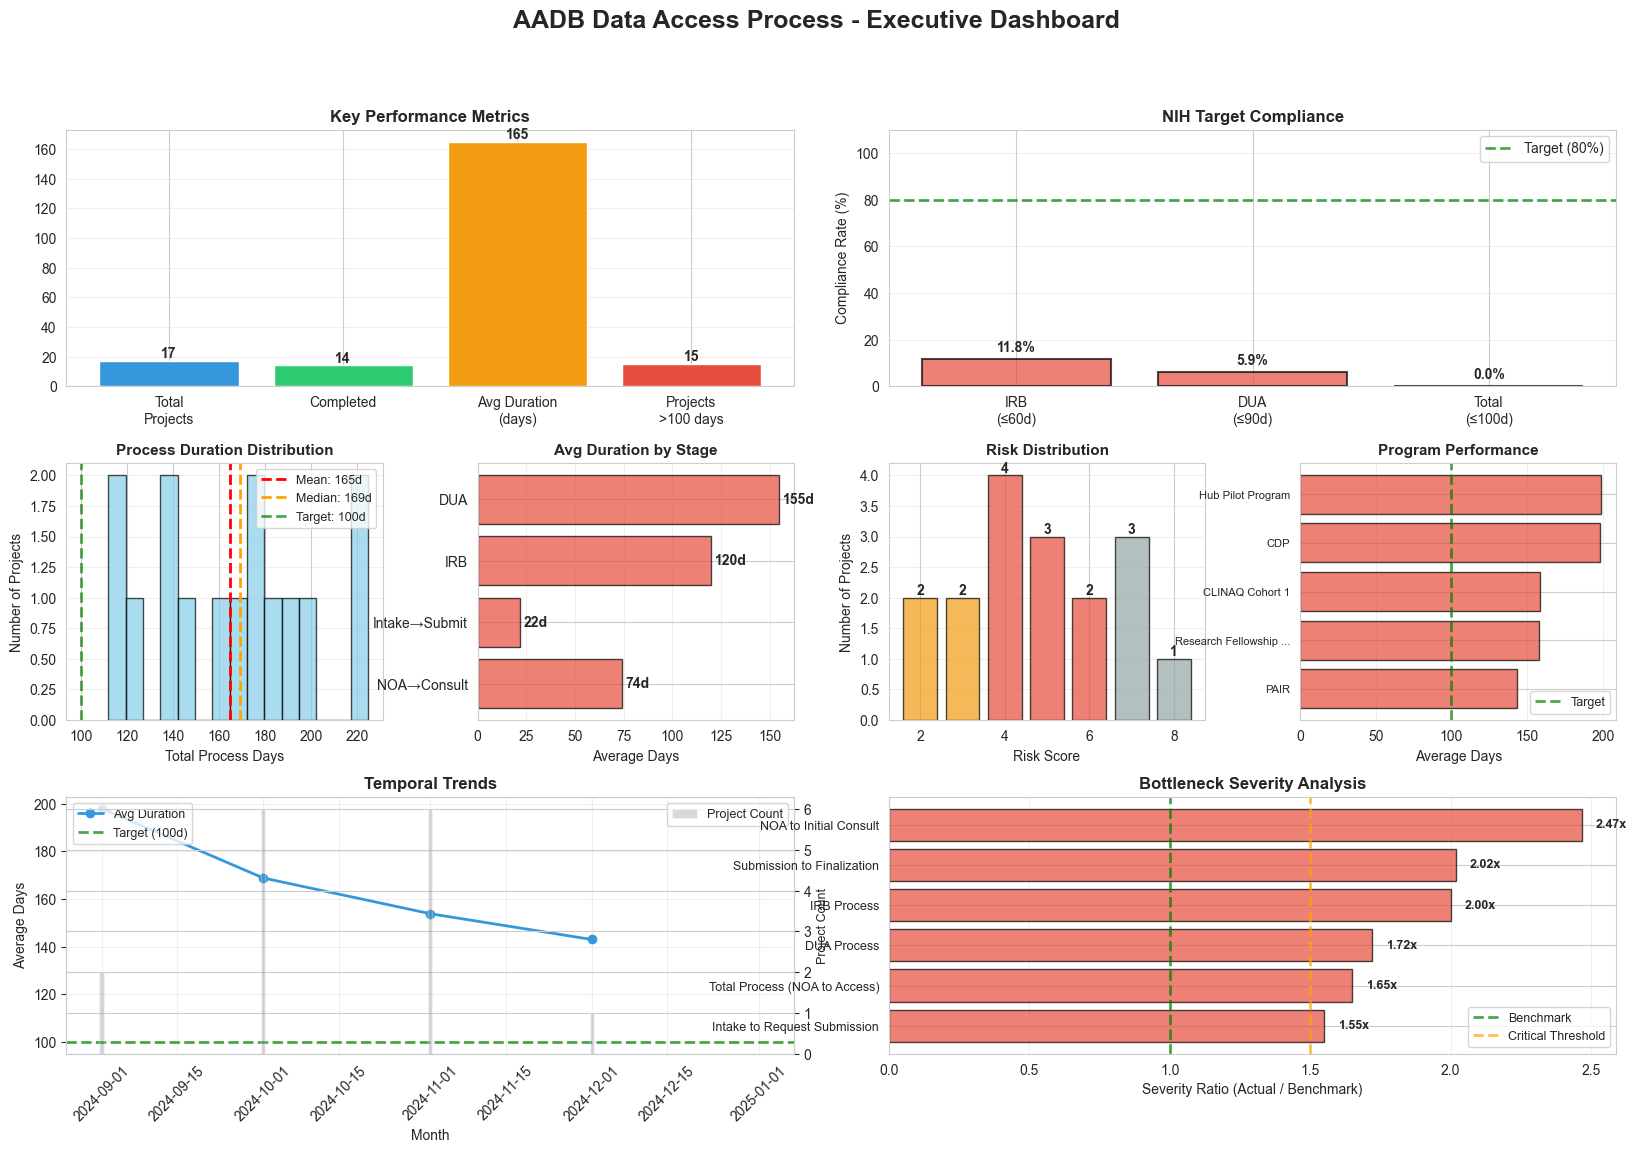


Creating process flow diagram...
✓ Process flow diagram saved to visualizations/process_flow_diagram.png


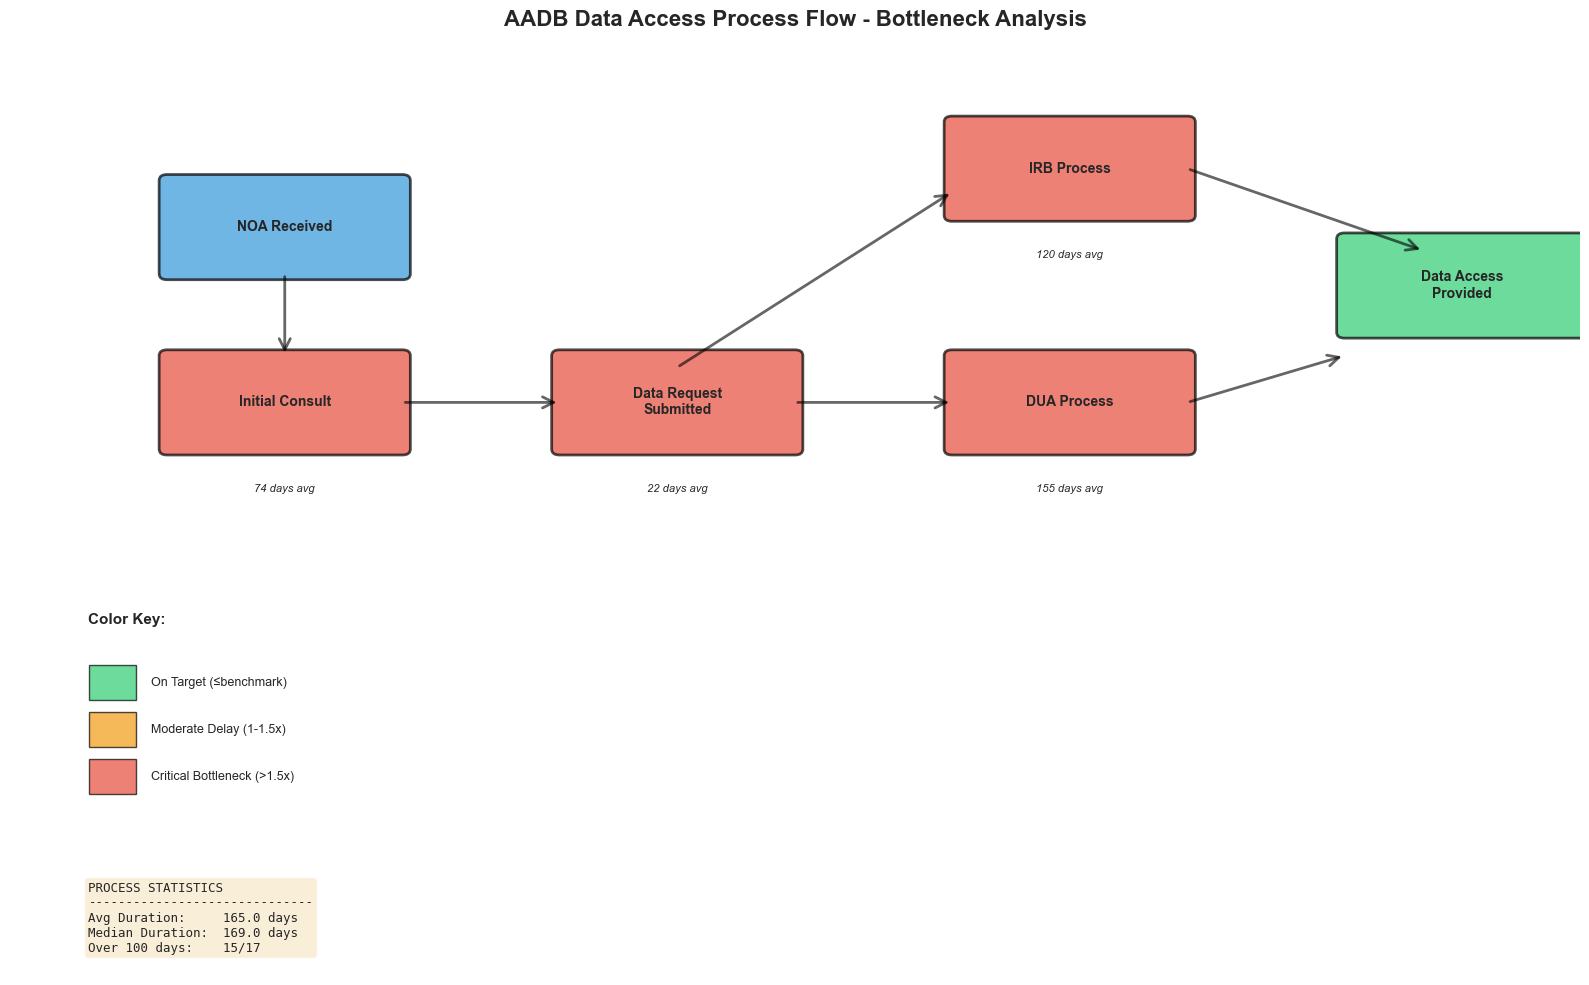

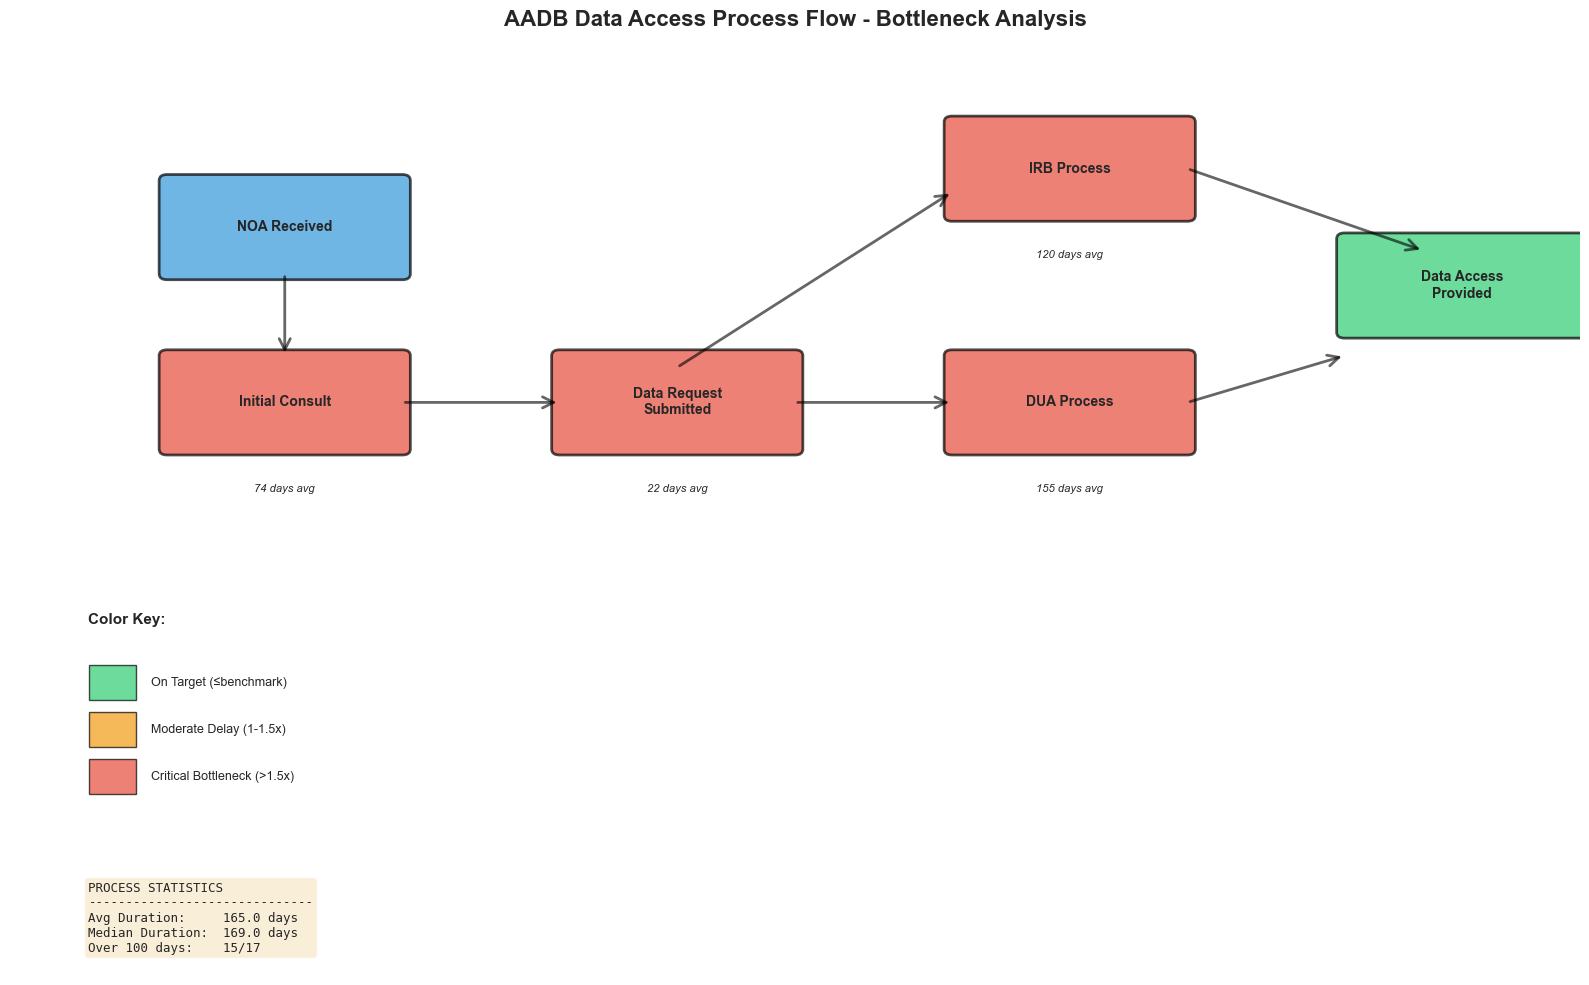

In [6]:
# Create visualizations
visualizer = AADBVisualizer(analyzer, predictor)

print("Creating executive dashboard...")
visualizer.create_executive_dashboard(save_path='visualizations/executive_dashboard.png')

print("\nCreating process flow diagram...")
visualizer.create_process_flow_diagram(save_path='visualizations/process_flow_diagram.png')


In [7]:
# Generate reports
reporter = AADBReportGenerator(analyzer, predictor)

print("Generating all reports...")
report_paths = reporter.save_reports(output_dir='reports')

print("\n" + "="*70)
print("✓ ANALYSIS COMPLETE!")
print("="*70)
print("\nGenerated files:")
for report_type, path in report_paths.items():
    print(f"  • {report_type}: {path}")
    
print("\nVisualizations saved to: visualizations/")
print("Model saved to: models/risk_predictor.pkl")


Generating all reports...

Generating reports...
✓ Executive summary saved to reports/Executive_Summary_20251125_1549.txt
✓ NIH monthly report saved to reports/NIH_Monthly_Report_20251125_1549.txt

Generating Excel report...
✓ Excel report saved to reports/Comprehensive_Analysis_20251125_1549.xlsx

✓ All reports generated successfully
  Output directory: reports

✓ ANALYSIS COMPLETE!

Generated files:
  • executive_summary: reports/Executive_Summary_20251125_1549.txt
  • nih_report: reports/NIH_Monthly_Report_20251125_1549.txt
  • excel_report: reports/Comprehensive_Analysis_20251125_1549.xlsx

Visualizations saved to: visualizations/
Model saved to: models/risk_predictor.pkl


---
## Summary

### ✓ Completed Analysis

You've successfully run the complete AADB analysis! Here's what was generated:

**Reports** (`reports/` directory):
- Executive Summary (TXT) - High-level overview
- NIH Monthly Report (TXT) - For stakeholder meetings
- Comprehensive Analysis (XLSX) - Detailed Excel workbook
- Early Warning Dashboard (CSV) - At-risk projects

**Visualizations** (`visualizations/` directory):
- Executive Dashboard (PNG) - Multi-panel KPI dashboard
- Process Flow Diagram (PNG) - Visual process map with bottlenecks

**Model** (`models/` directory):
- Risk Predictor (PKL) - Trained ML model for future predictions

### Next Steps

1. **Review Reports**: Check the `reports/` folder for detailed findings
2. **View Visualizations**: Open images in `visualizations/` folder
3. **Use Risk Model**: Predict risk for new projects using the saved model

### Quick Stats

Check the output above for:
- NIH compliance rates (IRB & DUA)
- Average process duration vs 100-day target
- High-risk projects requiring intervention
- Top bottlenecks and recommendations
